In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt 
%matplotlib inline
import matplotlib
from datetime import date
import warnings

## Set-Up and Basic Overview

In [3]:
df= pd.read_csv('/kaggle/input/customer-personality-analysis/marketing_campaign.csv',sep="\t")

In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


### Identifying Duplicates

In [6]:
df.duplicated().sum()

0

### Finding NULL values

In [7]:
df.isnull().sum()*100/df.shape[0]


ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

1.07% of Income columns values have nulls inside them.

### Droping the NULL values

In [8]:
df.dropna(axis = 0, inplace = True)

### Taking a look at unique values for categorical features

In [11]:
categorical_cols = df.select_dtypes('object').columns
for column in df[categorical_cols]:
    print(column, df[column].unique())

Education ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Marital_Status ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
Dt_Customer ['04-09-2012' '08-03-2014' '21-08-2013' '10-02-2014' '19-01-2014'
 '09-09-2013' '13-11-2012' '08-05-2013' '06-06-2013' '13-03-2014'
 '15-11-2013' '10-10-2012' '24-11-2012' '24-12-2012' '31-08-2012'
 '28-03-2013' '03-11-2012' '08-08-2012' '06-01-2013' '23-12-2012'
 '11-01-2014' '18-03-2013' '02-01-2013' '27-05-2013' '31-05-2013'
 '22-11-2013' '22-05-2014' '11-05-2013' '29-10-2012' '20-02-2013'
 '29-08-2013' '31-12-2013' '02-09-2013' '11-02-2014' '01-02-2013'
 '29-04-2013' '12-03-2013' '02-10-2013' '28-06-2014' '09-11-2012'
 '24-05-2013' '08-11-2012' '12-05-2014' '11-08-2012' '07-06-2014'
 '12-06-2013' '19-11-2012' '02-04-2013' '28-04-2014' '03-03-2014'
 '04-07-2013' '07-09-2012' '18-02-2013' '11-06-2013' '06-12-2013'
 '21-05-2013' '11-05-2014' '19-03-2014' '27-09-2013' '08-04-2013'
 '11-09-2012' '17-03-2013' '05-04-2013' '30-04-

## Data Cleaning

### Cleaning Categorical Features


In [12]:
df['Marital_Status'].unique()
df["Marital_Status"].replace({'Married': 'Relationship', 'Together': 'Relationship', 'Divorced': 'Single', 'Widow': 'Single', 'Alone': 'Single', 'YOLO': 'Single', 'Absurd': 'Single'}, inplace=True)
df['Education'].unique()
df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"}, inplace = True)
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])

## Feature Engineering

### Length of customer loyalty

In [13]:
df['today'] = '01-01-2023'
df['today'] = pd.to_datetime(df.today)
df['Customer_Duration'] = (df['today'] - df['Dt_Customer']).dt.days

### Age 

In [14]:
df["Age"] = 2023 - df["Year_Birth"]


### Total Spending & Campaigns Accepted

In [15]:
df["Total_Spending"] = (df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"])


### No of Children & Total Purchases

In [16]:
df["No_of_Children"] = df["Kidhome"] + df["Teenhome"]
df["Total_Purchases"] = df["NumWebPurchases"] + df["NumCatalogPurchases"] + df["NumStorePurchases"]



### Dropping Redundant Columns

In [17]:
df= df.drop(columns= (['Year_Birth','Kidhome','Teenhome']))

## Finding Outliers & Removal

In [18]:
df.describe()

,ID,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_Duration,Age,Total_Spending,No_of_Children,Total_Purchases
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.0,2216.0,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,5588.353339,52247.251354,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,...,0.013538,0.009477,3.0,11.0,0.150271,3460.006318,54.179603,607.075361,0.947202,12.557310
std,3249.376275,25173.076661,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,...,0.115588,0.096907,0.0,0.0,0.357417,232.469034,11.985554,602.900476,0.749062,7.204611
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,3.0,11.0,0.000000,2948.000000,27.000000,5.000000,0.000000,0.000000
25%,2814.750000,35303.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,...,0.000000,0.000000,3.0,11.0,0.000000,3288.000000,46.000000,69.000000,0.000000,6.000000
50%,5458.500000,51381.500000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,...,0.000000,0.000000,3.0,11.0,0.000000,3461.000000,53.000000,396.500000,1.000000,12.000000
75%,8421.750000,68522.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,...,0.000000,0.000000,3.0,11.0,0.000000,3634.000000,64.000000,1048.000000,1.000000,18.000000
max,11191.000000,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,...,1.000000,1.000000,3.0,11.0,1.000000,4011.000000,130.000000,2525.000000,3.000000,32.000000


### Visualizing the distribution of numerical features


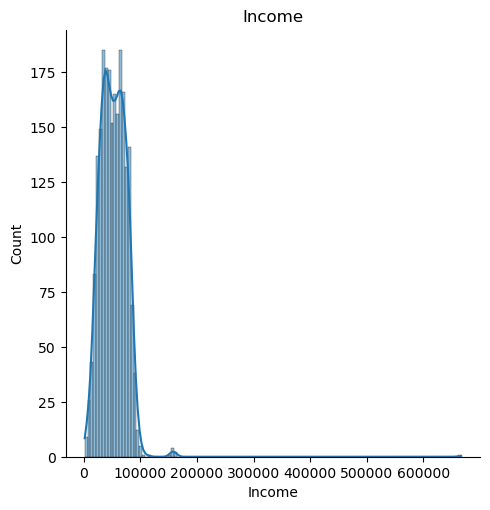

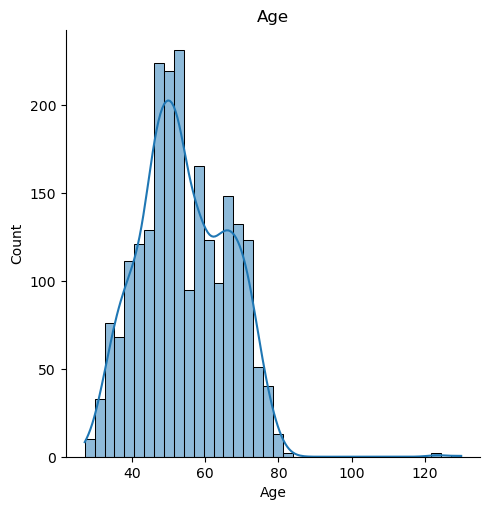

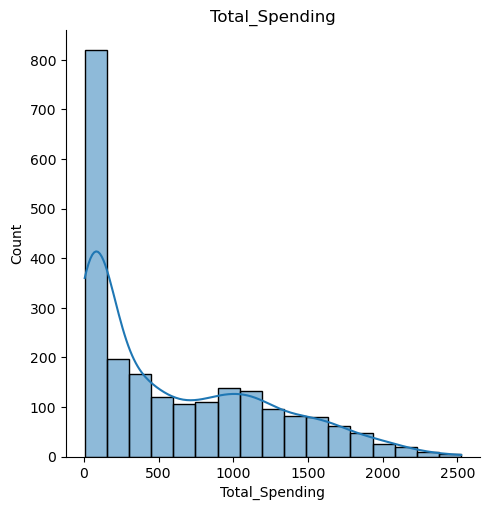

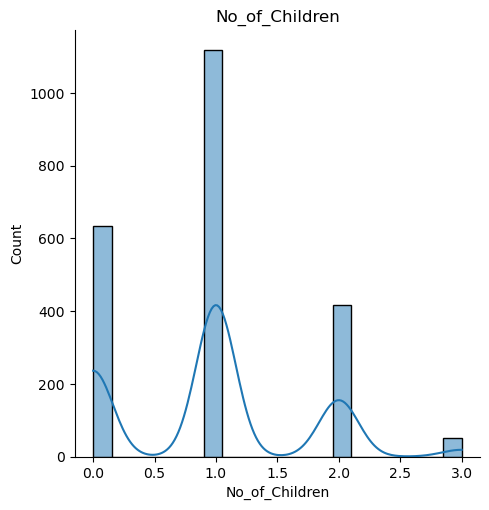

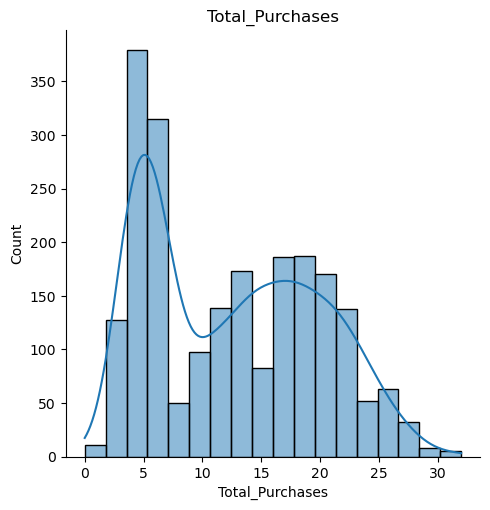

In [19]:
final= ['Education', 'Income','Age',
       'Total_Spending', 'No_of_Children',
       'Total_Purchases']

numerical_cols = df[final].select_dtypes(include=['int64', 'float64']).columns

# create distribution plots for each numerical column
for col in numerical_cols:
    sns.displot(df[col], kde= True)
    plt.title(col)
    plt.show()

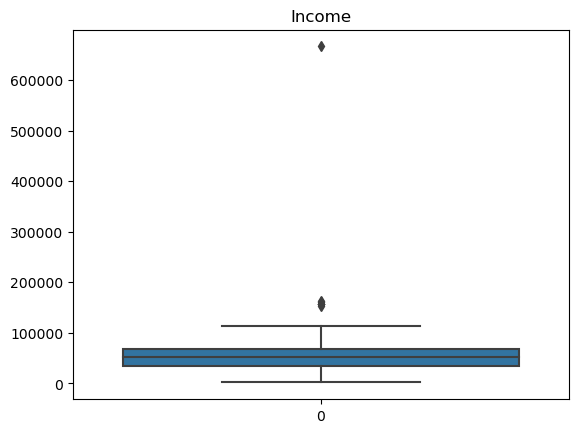

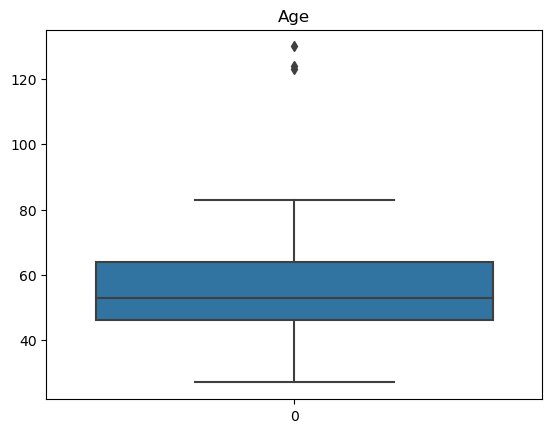

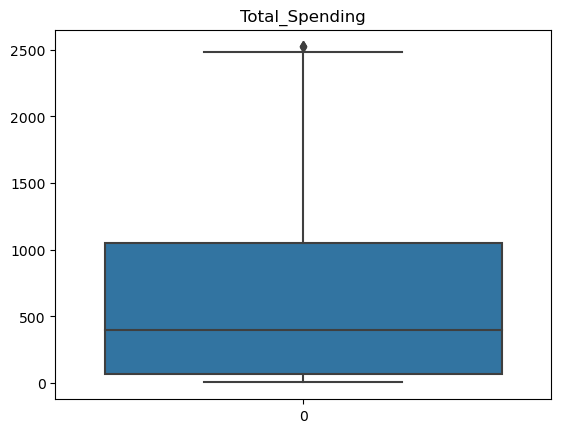

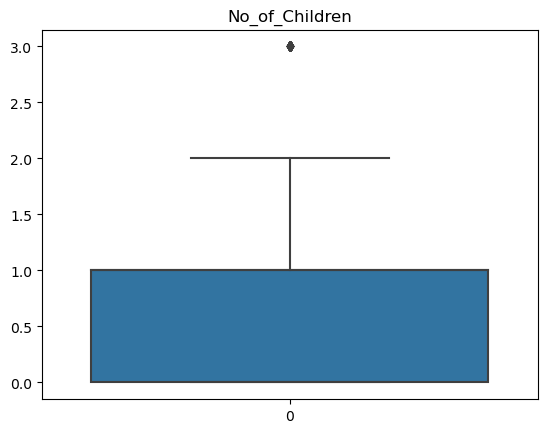

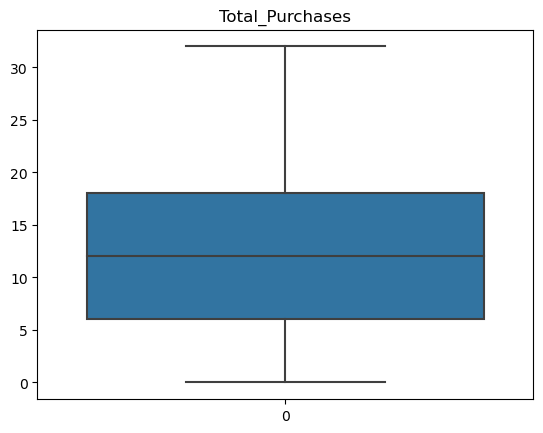

In [20]:

# create boxplots for each numerical column in selected features:
for col in numerical_cols:
    sns.boxplot(data=df[col])
    plt.title(col)
    plt.show()

There seems to be extreme skew and outliers in Age and Income. Thus, we will be removing these outlier values.

#### Function to remove outliers


In [21]:
def remove_outliers(df: pd.DataFrame, column: str) -> pd.Series:
    q3, q1 = np.nanpercentile(df[column], [75, 25])
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    df = df[(df[column] > lower_bound) & (df[column] < upper_bound)]

    return df


df = remove_outliers(df, 'Age')
df = remove_outliers(df, 'Income')


### Preserving original df

In [22]:
df_original= df.copy()

In [23]:
df.columns

Index(['ID', 'Education', 'Marital_Status', 'Income', 'Dt_Customer', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response', 'today', 'Customer_Duration', 'Age',
       'Total_Spending', 'No_of_Children', 'Total_Purchases'],
      dtype='object')

In [24]:
### Final DF of features to use

final= ['Income','Age',
       'Total_Spending',
       'Total_Purchases','NumDealsPurchases','NumWebVisitsMonth']
df= df[final]

<AxesSubplot:>

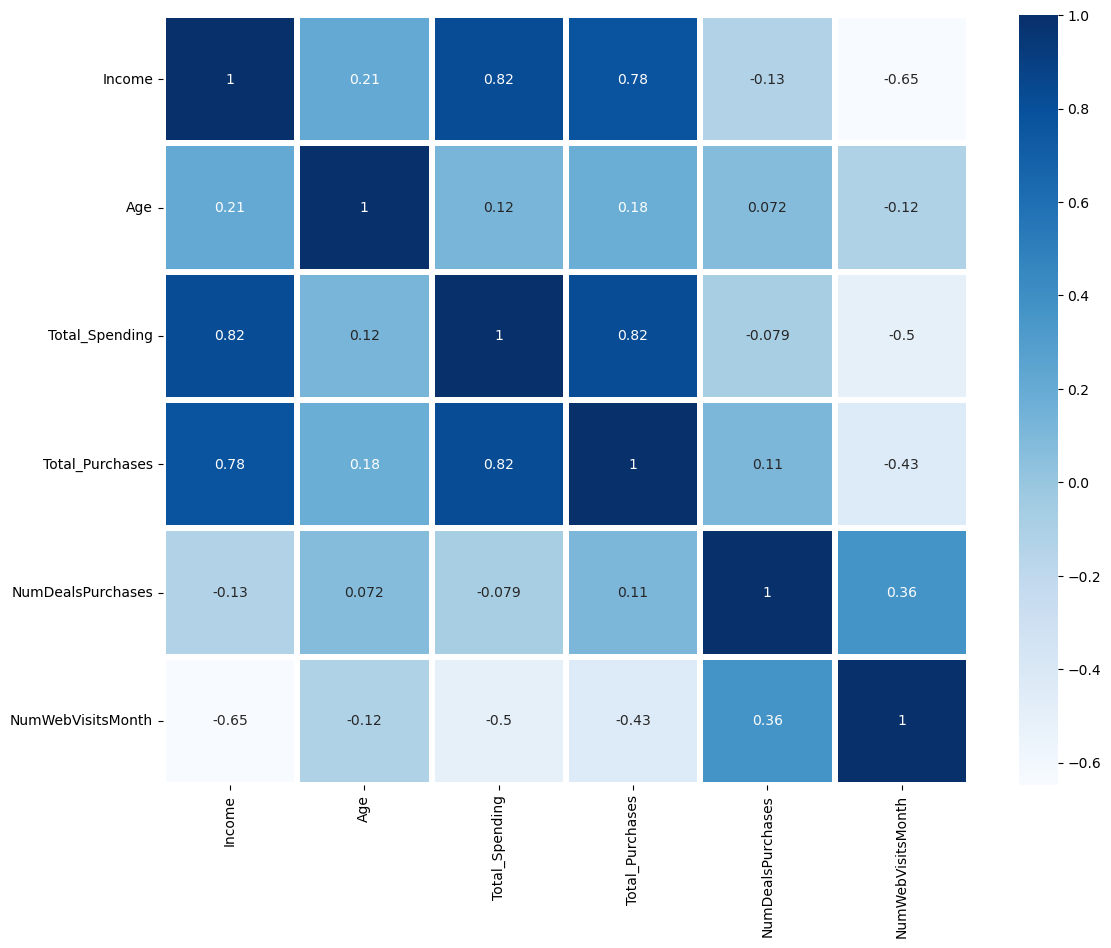

In [25]:
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(), cmap = "Blues", annot=True, linewidth=3)

## Data Preprocessing

### Encoding Categorical Features

In [26]:
categorical = df.select_dtypes(["object"]).columns

from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
for col in categorical:
    df[col]=df[[col]].apply(encode.fit_transform)

### Scaling the features

In [27]:
from sklearn.preprocessing import StandardScaler

df_scaled = df.copy()
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_scaled)
df_scaled = pd.DataFrame(df_scaled, columns= df.columns)

In [28]:
df_scaled.head()

,Income,Age,Total_Spending,Total_Purchases,NumDealsPurchases,NumWebVisitsMonth
0,0.314651,1.017189,1.679323,1.313658,0.361479,0.689203
1,-0.254877,1.273530,-0.963897,-1.193752,-0.168834,-0.139645
2,0.965354,0.333612,0.281242,1.035057,-0.699147,-0.554069
3,-1.206087,-1.289883,-0.920675,-0.915151,-0.168834,0.274779
4,0.322136,-1.033542,-0.307248,0.199254,1.422105,-0.139645


###  Dimensionality Reduction: PCA

Reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss.


Dimensions for this dataset will be reduced to 3


In [29]:
from sklearn.decomposition import PCA


pca = PCA(n_components = 3)
pca.fit(df_scaled)

data_pca = pd.DataFrame(pca.transform(df_scaled), columns=["col1", "col2", "col3"])

data_pca.head().T

,0,1,2,3,4
col1,-1.511397,0.962456,-1.519230,1.859790,0.116230
col2,1.403913,-0.185944,-0.349533,-0.804690,0.795523
col3,-0.164726,-1.663219,-0.256292,0.794744,1.238090


## Applying K-Means Clustering

### Finding the optimal k number of clusters to form using the elbow method

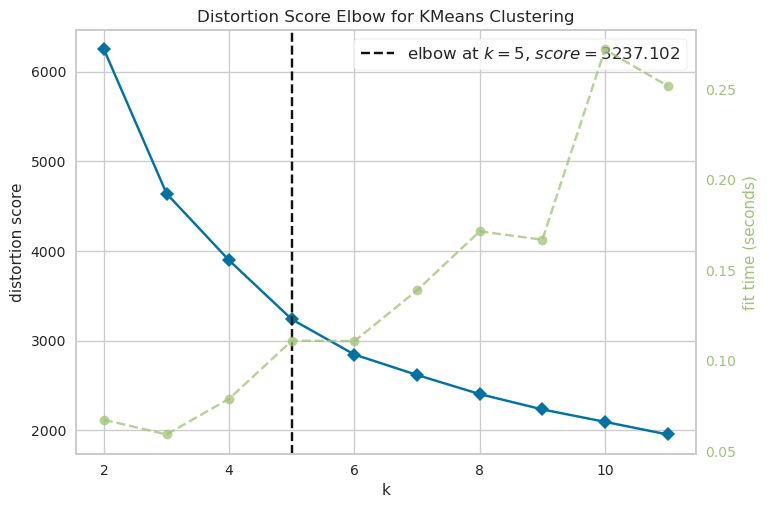

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [31]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

elbow = KElbowVisualizer(KMeans(), k=11)
elbow.fit(data_pca)
elbow.show()

### Clustering the data into 5 

In [32]:
kmeans = KMeans(n_clusters=5, random_state=42)
predictions = kmeans.fit_predict(data_pca)


kmeans.labels_

array([1, 4, 1, ..., 2, 1, 4], dtype=int32)

### Transfering the cluster labels back to the original dataframe

In [33]:
data= df_original.copy()

data['Cluster'] = kmeans.labels_
data.head()

,ID,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Z_CostContact,Z_Revenue,Response,today,Customer_Duration,Age,Total_Spending,No_of_Children,Total_Purchases,Cluster
0,5524,Graduate,Single,58138.0,2012-04-09,58,635,88,546,172,...,3,11,1,2023-01-01,3919,66,1617,0,22,1
1,2174,Graduate,Single,46344.0,2014-08-03,38,11,1,6,2,...,3,11,0,2023-01-01,3073,69,27,2,4,4
2,4141,Graduate,Relationship,71613.0,2013-08-21,26,426,49,127,111,...,3,11,0,2023-01-01,3420,58,776,0,20,1
3,6182,Graduate,Relationship,26646.0,2014-10-02,26,11,4,20,10,...,3,11,0,2023-01-01,3013,39,53,1,6,0
4,5324,Postgraduate,Relationship,58293.0,2014-01-19,94,173,43,118,46,...,3,11,0,2023-01-01,3269,42,422,1,14,3


## Customer Personality Analysis by Clusters

In [34]:
data.Cluster.value_counts()

0    669
4    413
2    405
1    403
3    315
Name: Cluster, dtype: int64

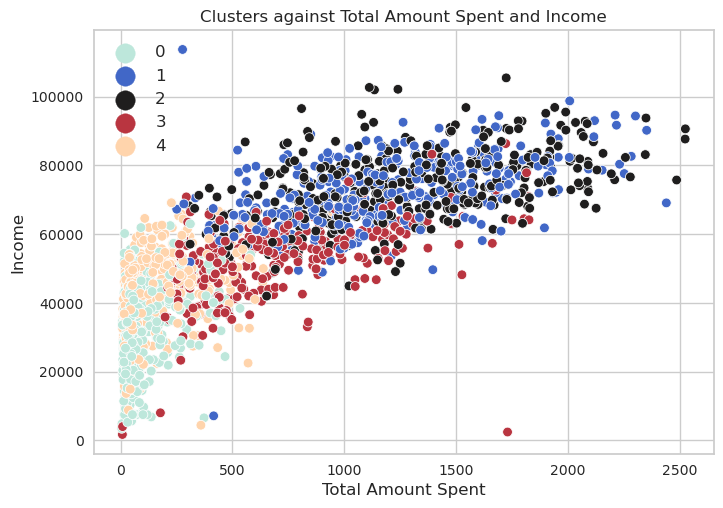

In [48]:

a= sns.scatterplot(data=data, x="Total_Spending", y="Income", hue="Cluster", palette="icefire")

a.set_title("Clusters against Total Amount Spent and Income",fontsize=12)
a.set_ylabel("Income",fontsize=12)
a.set_xlabel("Total Amount Spent",fontsize=12)
plt.legend(fontsize=12,markerscale=2)


plt.show()

#### Insights

Cluster 2 would be the most valuable customer group as they have the biggest spending power and income level. 
Cluster 1 follows closely behind in value in terms of amount spent and income level.

Cluster 0 seems to be the customer group with the lowest income and lowest level of amount spent closely followed by Cluster 4. These are also the two biggest customer clusters in this dataset.


### Boxplots of Income & Total Spending per Cluster

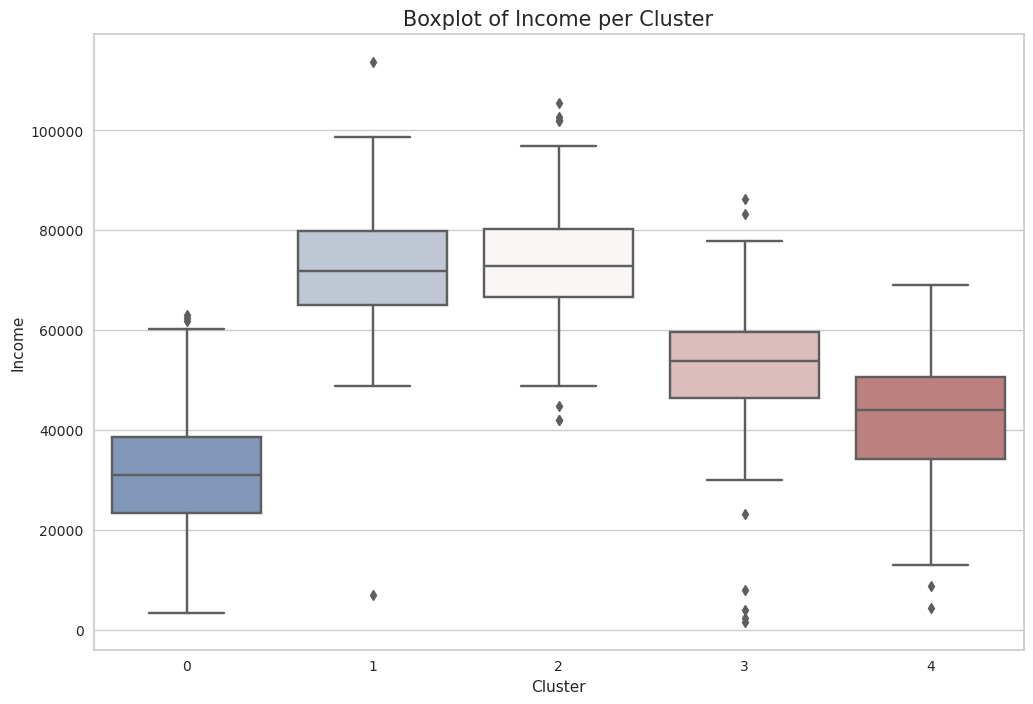

In [53]:

plt.figure(figsize=(12, 8))
sns.boxplot(x=data["Cluster"], y=df["Income"], palette='vlag')
plt.title("Boxplot of Income per Cluster", size=15)
plt.show()

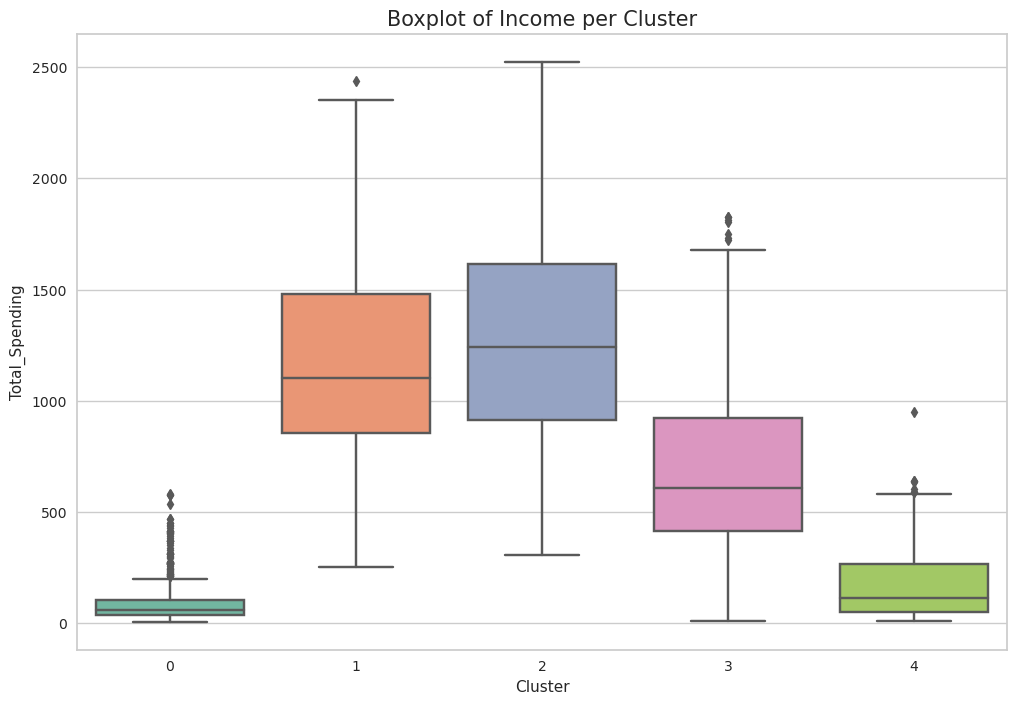

In [55]:
plt.figure(figsize=(12, 8))
sns.boxplot(x=data["Cluster"], y=data["Total_Spending"], palette='Set2')
plt.title("Boxplot of Income per Cluster", size=15)
plt.show()

### Marital Status by Cluster

In [38]:
pd.crosstab(data['Cluster'], data['Marital_Status'], normalize='index') * 100


Marital_Status,Relationship,Single
Cluster,,
0,65.171898,34.828102
1,63.027295,36.972705
2,62.222222,37.777778
3,66.031746,33.968254
4,65.859564,34.140436


There seems to be no significant differences between the clusters in terms of proportions of each marital status.

### Scatterplot of Clusters by Age and Income

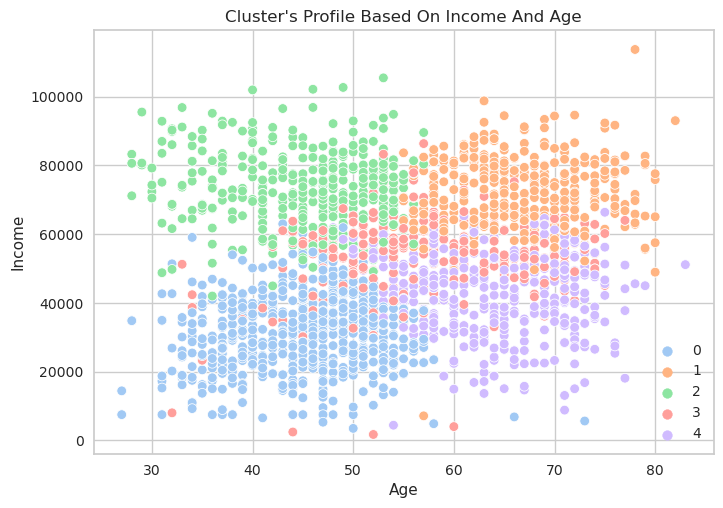

In [56]:
pl = sns.scatterplot(data = data,x=data["Age"], y=data["Income"],hue=data["Cluster"], palette= 'pastel')
pl.set_title("Cluster's Profile Based On Income And Age")
plt.legend()
plt.show()


#### Insight

Cluster 1 tends to be older in age and have a higher income whereas Cluster 2 seems to be younger with higher income.

The least spending and lowest income cluster, Cluster 0 tends to be in the younger range. Cluster 4 seems to be in the older and lower income range.

### Clusters by No. of Purchases and Average Order Value

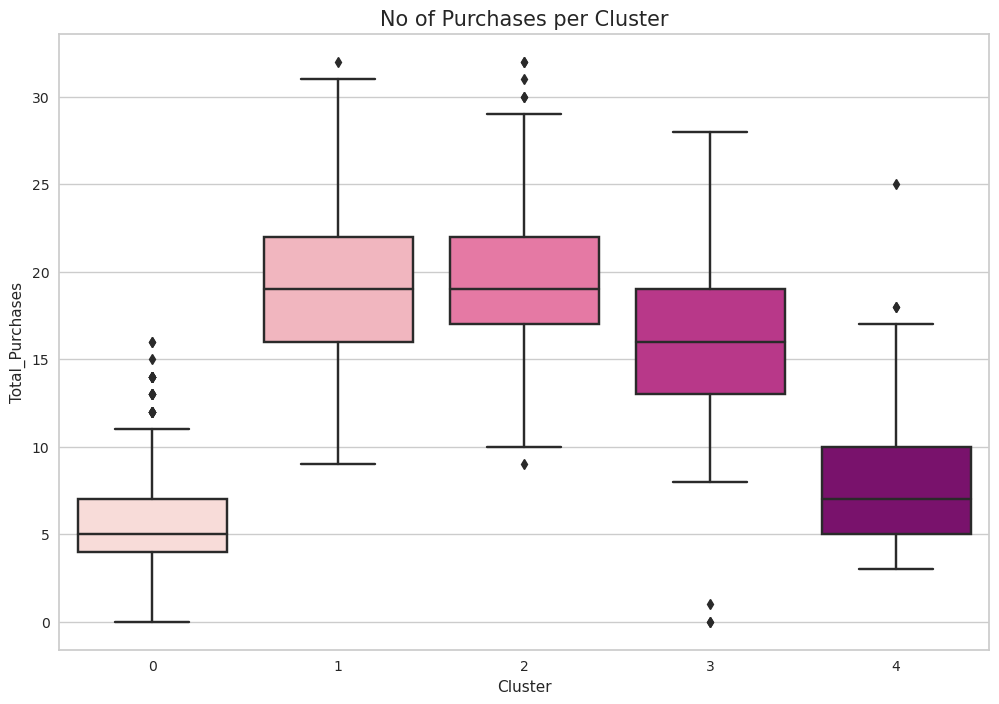

In [57]:
plt.figure(figsize=(12, 8))
sns.boxplot(x=data["Cluster"], y=data["Total_Purchases"], palette='RdPu')
plt.title("No of Purchases per Cluster", size=15)
plt.show()

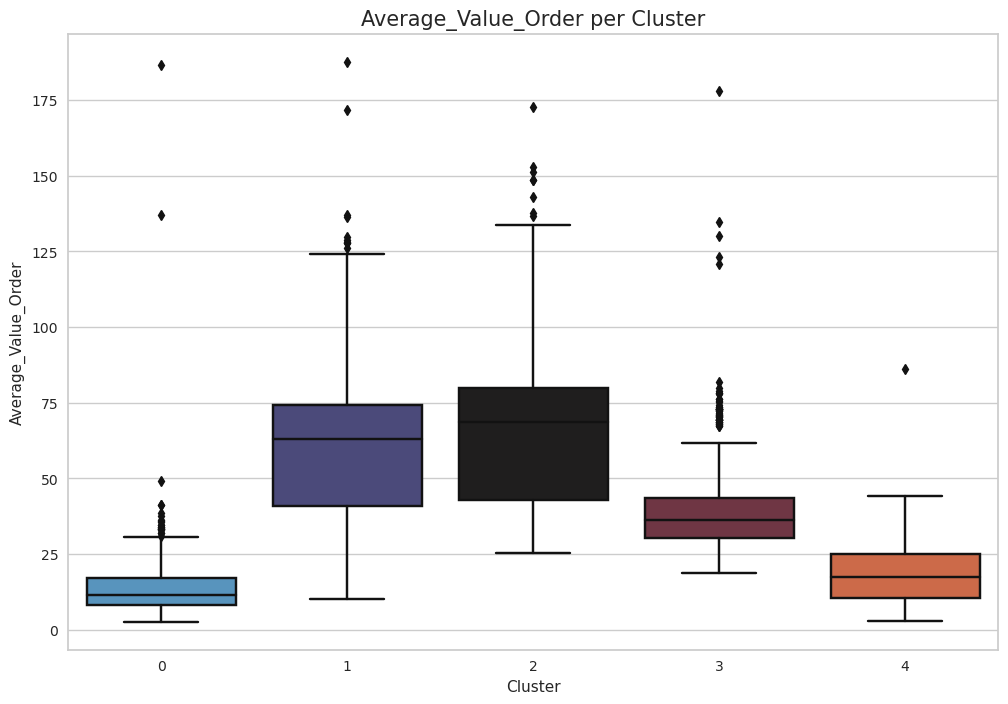

In [59]:
data['Average_Value_Order']= data['Total_Spending']/data['Total_Purchases']

plt.figure(figsize=(12, 8))
sns.boxplot(x=data["Cluster"], y=data["Average_Value_Order"], palette='icefire')
plt.title("Average_Value_Order per Cluster", size=15)
plt.show()

#### Insights

While Cluster 1 and 2 have similar distribution and mean in total number of purchases, when calculating the average value of a purchase, it shows that Cluster 2 is higher than Cluster 1 in terms of average order value and Cluster 3, while it has lower but still relatively high number of purchases, its average order value lags significantly behind Cluster 2 and 1.



### Clusters by Number of Children

In [62]:
c= pd.crosstab(data['Cluster'], data['No_of_Children'], normalize='index') * 100
c.columns.name = 'No of Children'
c.index.name = 'Cluster'

c

No of Children,0,1,2,3
Cluster,,,,
0,11.659193,68.310912,18.535127,1.494768
1,56.327543,38.957816,4.466501,0.248139
2,62.469136,35.061728,2.469136,0.000000
3,2.857143,58.412698,33.968254,4.761905
4,14.769976,41.646489,37.772397,5.811138


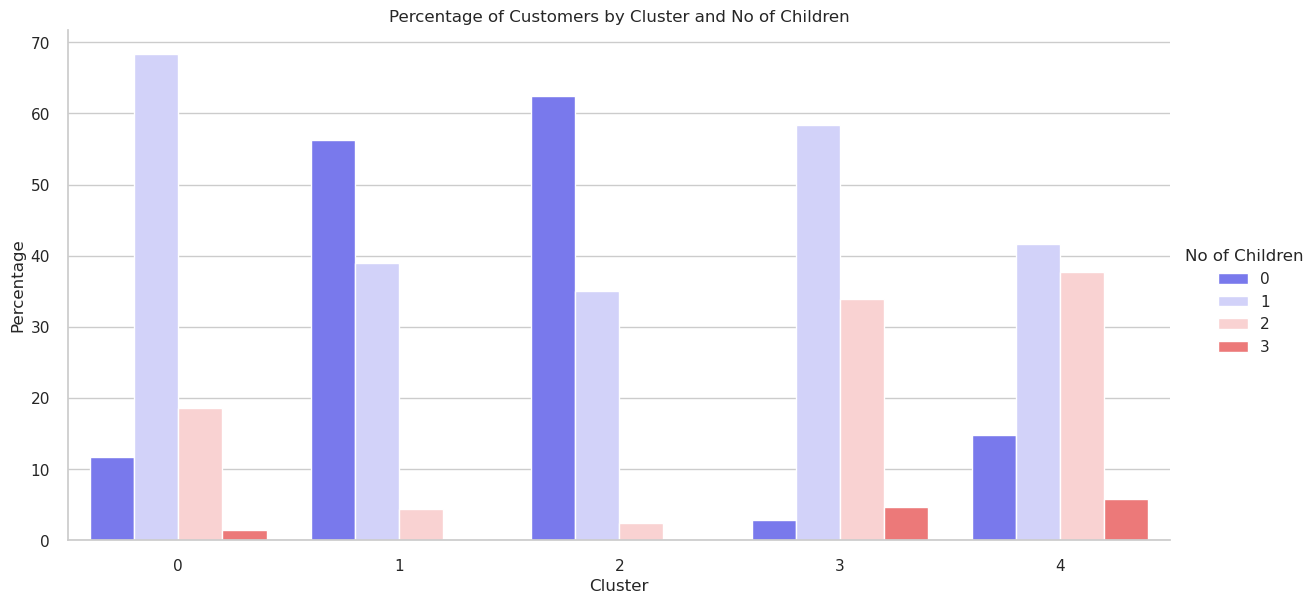

In [69]:
c_melted = c.reset_index().melt(id_vars='Cluster', var_name='No of Children', value_name='Percentage')

sns.set(style='whitegrid')

sns.catplot(x='Cluster', y='Percentage', hue='No of Children', kind='bar', data=c_melted, height=6, aspect=2, palette='bwr')

plt.title('Percentage of Customers by Cluster and No of Children')
plt.xlabel('Cluster')
plt.ylabel('Percentage')

plt.show()

### Insights 

Cluster 2 has the highest proportion of no children. Cluster 1 follows 2nd in highest proportion of childfree customers within its own cluster. Thus, the two most profitable customer groups have more than 50% of their customers being childfree.

Cluster 3 has the biggest share of customers having at least one child followed by Cluster 0.



Thus it can be grouped as this: 

Childfree Majority: Cluster 1 & 2

With Child Majority: Cluster 0, 3 and 4

### Clusters by Deal Purchases

In [43]:
data['NumDealsPurchases'].max()

15

In [72]:
bins = [-1, 0, 3, 5, data['NumDealsPurchases'].max()]
labels = ['0', '1-3', '3-5', '5 and over']
data['NumDealsPurchases_cat'] = pd.cut(data['NumDealsPurchases'], bins=bins, labels=labels)

ct = pd.crosstab(data['Cluster'], data['NumDealsPurchases_cat'], normalize='index') * 100
ct.columns.name = 'Number of Deal Purchases'
ct.index.name = 'Cluster'

ct

Number of Deal Purchases,0,1-3,3-5,5 and over
Cluster,,,,
0,0.747384,90.134529,9.118087,0.000000
1,4.218362,90.570720,5.210918,0.000000
2,3.950617,92.592593,3.456790,0.000000
3,0.000000,10.793651,44.126984,45.079365
4,0.242131,88.619855,11.138015,0.000000


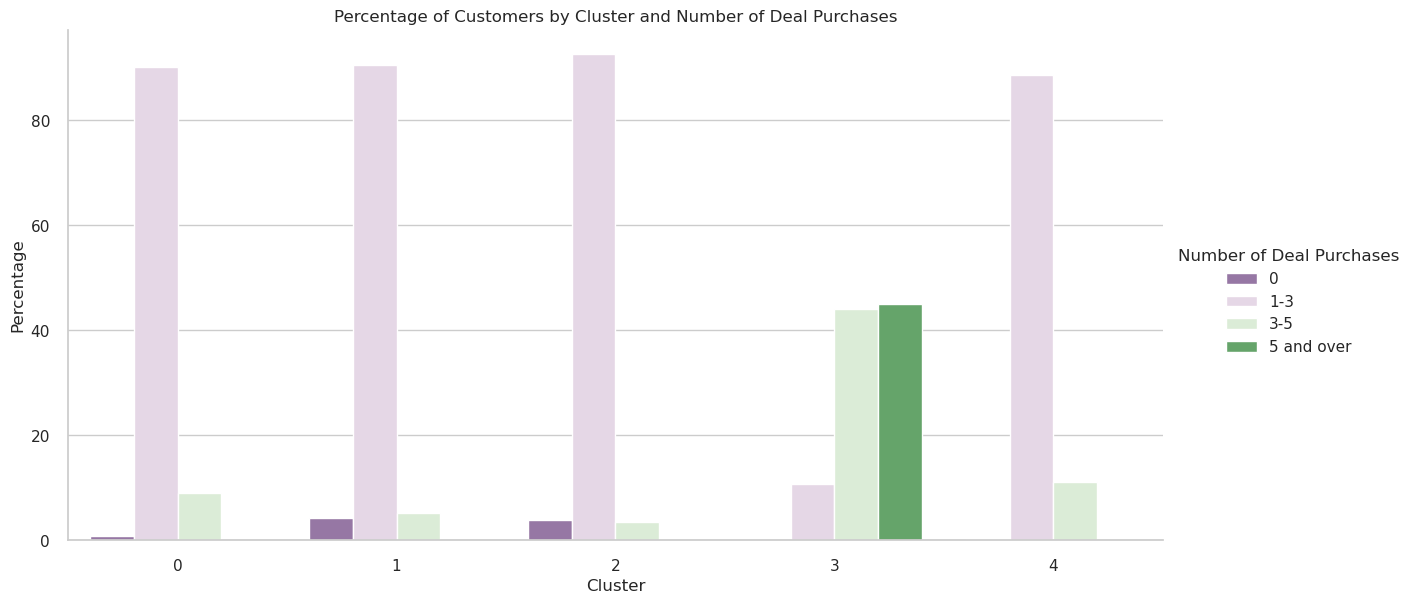

In [76]:

ct_melted = ct.reset_index().melt(id_vars='Cluster', var_name='Number of Deal Purchases', value_name='Percentage')

sns.set(style='whitegrid')

sns.catplot(x='Cluster', y='Percentage', hue='Number of Deal Purchases', kind='bar', data=ct_melted, height=6, aspect=2, palette='PRGn')

plt.title('Percentage of Customers by Cluster and Number of Deal Purchases')
plt.xlabel('Cluster')
plt.ylabel('Percentage')
plt.show()

### Insights

Cluster 1 seems to be the most unresponsive to deals out of all the clusters with 4% of customers not purchasing with any deals. However, this is not very significant as 90% of cluster 1 has purchases with a deal from 1-3 times. Cluster 3  is the most responsive to deals with all its customers purchasing with at least one deal and 90% of its customers purchasing with deals over 3 times. 

However, Cluster 0,1,2 and 4 are still moderately responsive to deal purchases with around 90% of each cluster having had deal purchases of 1-3. 

### Clusters by Campaign Responsiveness

In [45]:
# create a list of column names with a value of 1
cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

# create a function to apply to each row of the dataframe
def get_accepted_campaigns(row):
    # initialize an empty list to store the campaign names
    campaigns = []
    # iterate over the columns and check the values
    for col in cols:
        if row[col] == 1:
            campaigns.append(col)
    # check the number of campaigns and return the appropriate string
    if len(campaigns) == 1:
        return campaigns[0]
    elif len(campaigns) == 0:
        return 'No Campaigns Accepted'
    else:
        return 'Multiple Campaigns Accepted'

# create a new column called "Accepted_Campaigns" and fill it with the names of the columns with a value of 1
data['Accepted_Campaigns'] = data.apply(get_accepted_campaigns, axis=1)


In [46]:
c= pd.crosstab(data['Cluster'], data['Accepted_Campaigns'], normalize='index') * 100
c.columns.name = 'Accepted_Campaigns'
c.index.name = 'Cluster'

c

Accepted_Campaigns,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Multiple Campaigns Accepted,No Campaigns Accepted
Cluster,,,,,,,
0,0.000000,0.000000,8.968610,0.000000,0.000000,0.149477,90.881913
1,7.444169,0.248139,3.722084,4.714640,7.196030,10.173697,66.501241
2,4.197531,0.000000,3.703704,3.703704,6.666667,19.506173,62.222222
3,1.587302,0.000000,8.253968,9.206349,0.317460,4.126984,76.507937
4,0.000000,0.000000,3.147700,4.842615,0.000000,0.484262,91.525424


#### Insights

Cluster 0 and 4 are the most resistant to campaigns with 90% and 91% respectively of the customers having not accepted a single campaign. 

Cluster 2 is the least resistant to campaigns with around 38% of customers having accepted at least one campaign.

Cluster 2 also has the highest % of customers in the cluster that has accepted multiple campaigns. Cluster 1 is also responsive to multiple campaigns with 10% of customers in the cluster having accepted multiple campaigns



### Customer Duration (Loyalty) per Cluster

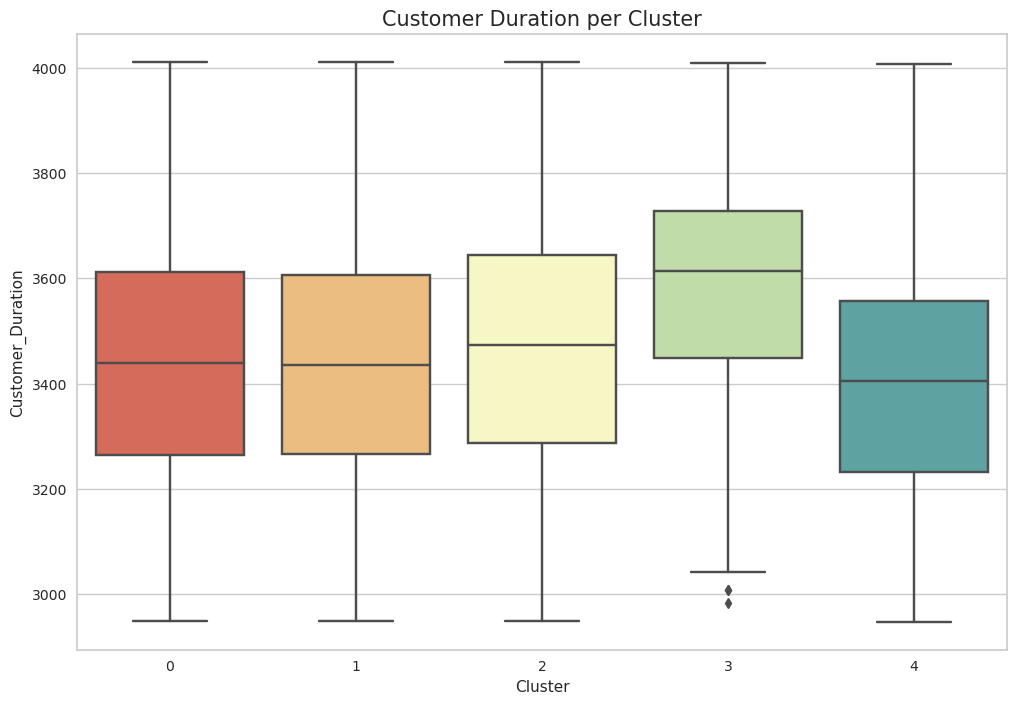

In [47]:
plt.figure(figsize=(12, 8))
sns.boxplot(x=data["Cluster"], y=data["Customer_Duration"], palette='Spectral')
plt.title("Customer Duration per Cluster", size=15)
plt.show()

#### Insights

All clusters are fairly even in customer duration with Cluster 3 having a slightly higher aggregate customer duration.

### Cross Tabulation of Education and Purchase Medium

In [81]:
ct= pd.crosstab(data['Cluster'], data['Education'], normalize='index') * 100

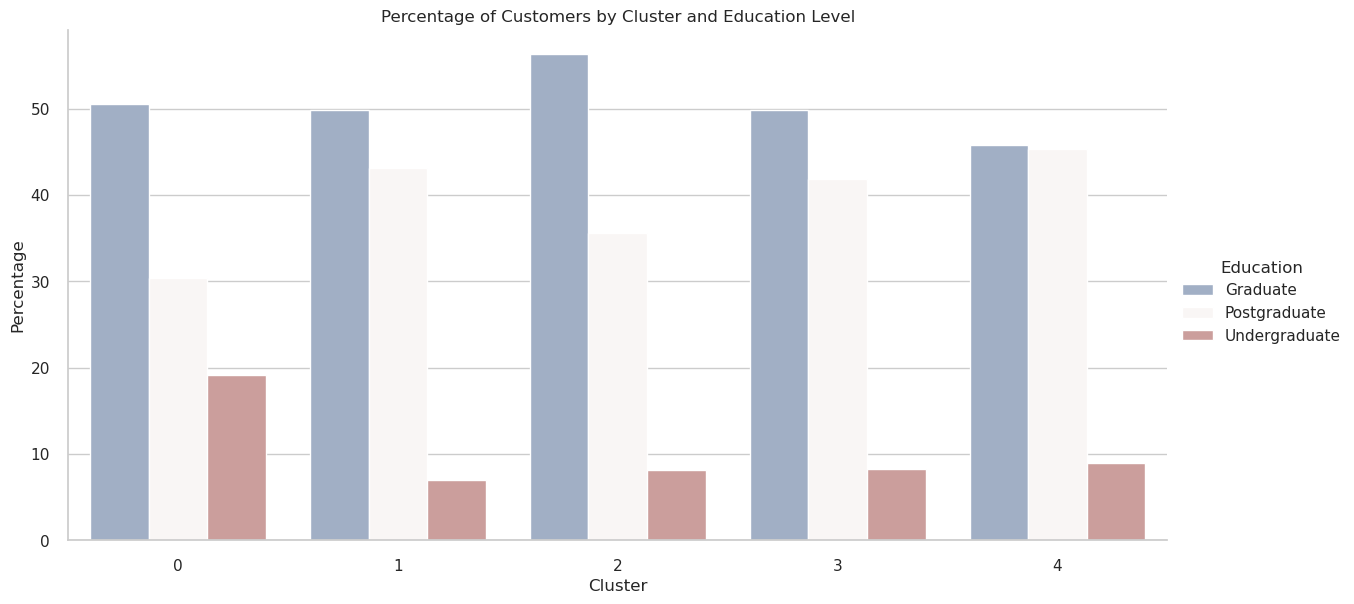

In [82]:
ct_melted = ct.reset_index().melt(id_vars='Cluster', var_name='Education', value_name='Percentage')

sns.set(style='whitegrid')

sns.catplot(x='Cluster', y='Percentage', hue='Education', kind='bar', data=ct_melted, height=6, aspect=2, palette='vlag')
plt.title('Percentage of Customers by Cluster and Education Level')
plt.xlabel('Cluster')
plt.ylabel('Percentage')

plt.show()

In [83]:
med_data = data.groupby('Cluster')['NumStorePurchases', 'NumWebPurchases','NumCatalogPurchases'].median().reset_index()
med_data

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Cluster,NumStorePurchases,NumWebPurchases,NumCatalogPurchases
0,0,3.0,2.0,0.0
1,1,8.0,5.0,5.0
2,2,9.0,5.0,5.0
3,3,7.0,6.0,2.0
4,4,4.0,2.0,1.0


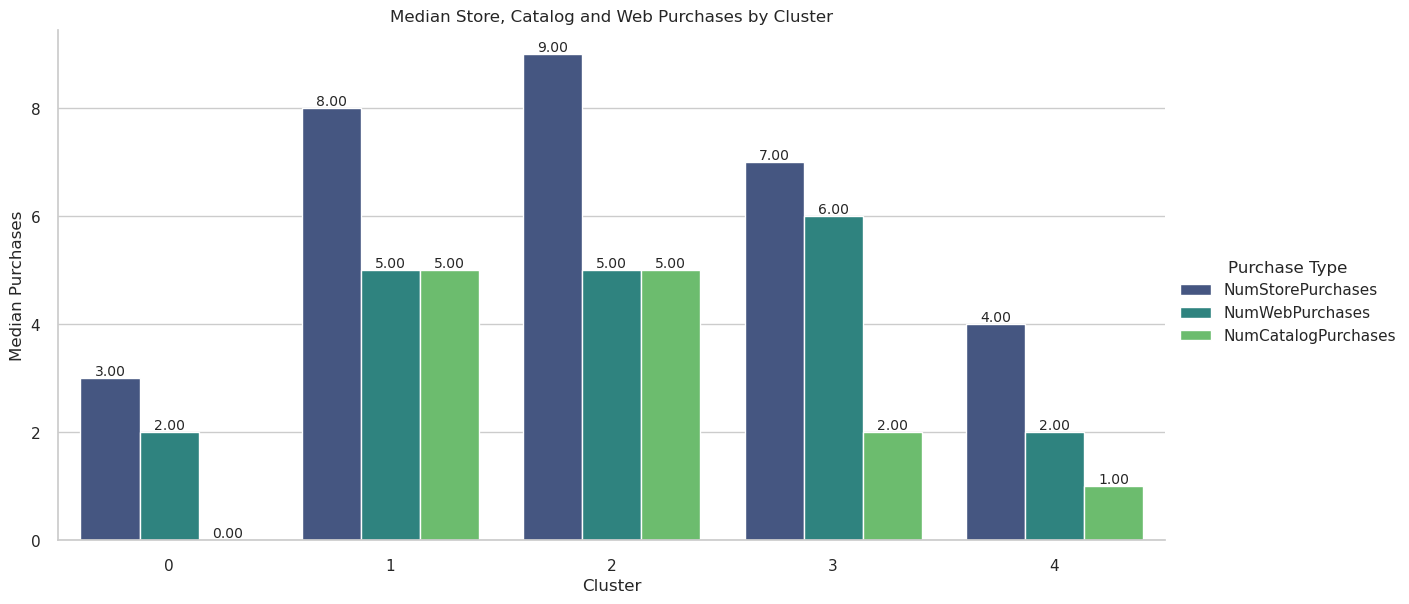

In [86]:

med_data_melt = med_data.melt(id_vars=['Cluster'], var_name='Purchase Type', value_name='Median Purchases')

sns.set(style='whitegrid')
g = sns.catplot(x='Cluster', y='Median Purchases', hue='Purchase Type', kind='bar', data=med_data_melt, height=6, aspect=2, palette='viridis')
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10)

plt.title('Median Store, Catalog and Web Purchases by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Median Purchases')
plt.show()

#### Insight


Cluster 2 has the highest Store Purchases followed closely by clusters 1 and 3.
Cluster 1& 2 have the highest median catalog purchases.

Cluster 3 has the highest number of online web purchases.

Cluster 0 has the lowest median purchases both online and offline and has no catalog purchases.



### Clusters by Product Category Purchases

In [87]:
data.columns

Index(['ID', 'Education', 'Marital_Status', 'Income', 'Dt_Customer', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response', 'today', 'Customer_Duration', 'Age',
       'Total_Spending', 'No_of_Children', 'Total_Purchases', 'Cluster',
       'Average_Value_Order', 'NumDealsPurchases_cat'],
      dtype='object')

In [88]:
med_data = data.groupby('Cluster')['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts','MntSweetProducts', 'MntGoldProds'].median().reset_index()


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [89]:
med_data

,Cluster,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,0,15.0,3.0,14.0,4.0,3.0,10.0
1,1,524.0,35.0,276.0,54.0,35.0,47.0
2,2,571.0,44.0,351.0,69.0,47.0,54.0
3,3,359.0,8.0,101.0,12.0,9.0,42.0
4,4,53.0,2.0,19.0,3.0,2.0,11.0


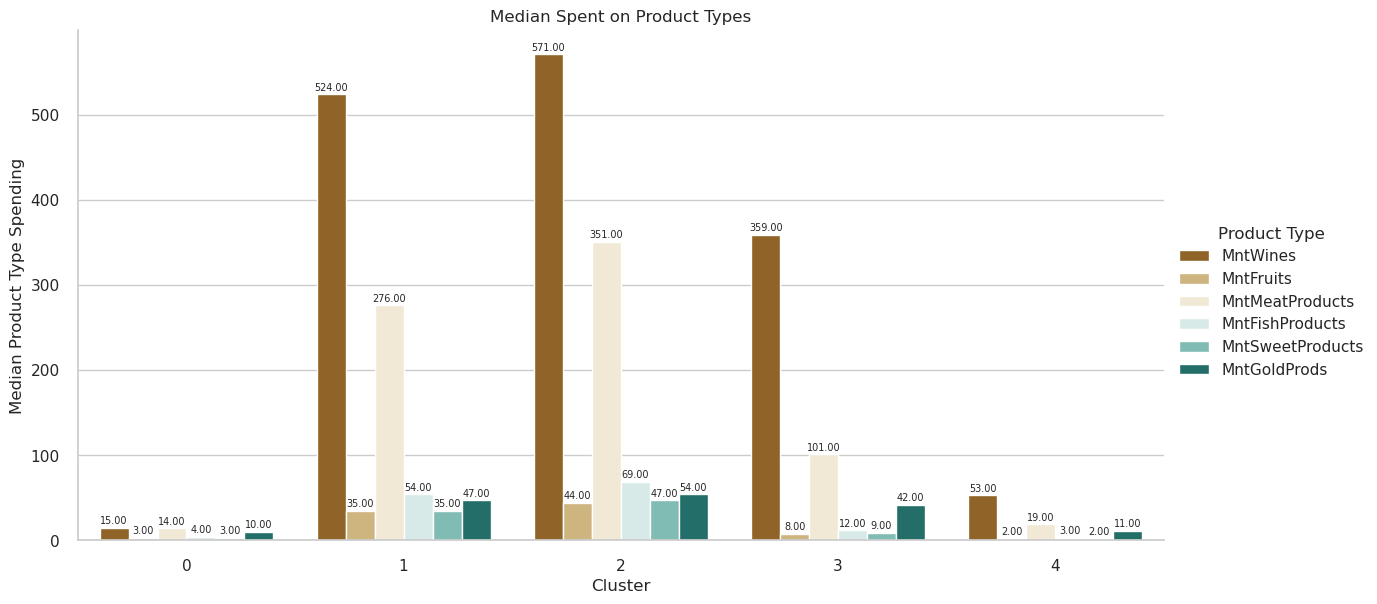

In [94]:

med_data_melt = med_data.melt(id_vars=['Cluster'], var_name='Product Type', value_name='Median Spent on Product Types')

sns.set(style='whitegrid')
g= sns.catplot(x='Cluster', y='Median Spent on Product Types', hue='Product Type', kind='bar', data=med_data_melt, height=6, aspect=2, palette='BrBG')
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=7)

plt.title('Median Spent on Product Types')
plt.xlabel('Cluster')
plt.ylabel('Median Product Type Spending')

plt.show()


#### Insights

Cluster 2 spends the most on wines by median amount out of all product categories and clusters.

All the clusters spend the most on Wines and Meat products.

The product category with the least median amount spent by all clusters are sweets followed by fruits.

Fish products are also fairly underspent by all clusters relative to other product categories. However,in Cluster 2 it ranks 4th in median amount spent.





## Overall Summary of Each Cluster

### Cluster Characteristics by Spending, Income, Number of Purchases and Average Order Value.

#### Cluster 0

Cluster 0 tends to spend the least in median amount (58) and has the lowest median income (31.16k). It also has the lowest median number of purchases and average order value.


#### Cluster 1
Cluster 1 follows 2nd to Cluster 2 in terms of spending the 2nd most and earning the 2nd most. This also makes Cluster 1 a very valuable customer group to target. Cluster 1 has the same median number of purchases than Cluster 2.

#### Cluster 2

Cluster 2 has the highest median income (72.94k) and highest median spending (1240) amongst all the clusters, making this a very valuable customer group to target. Cluster 2, despite having same median number of purchases as Cluster 1 has a higher median average order value of each purchase unit.

#### Cluster 3
Cluster 3 is solidly in the middle in terms of income and spending at 58.84k and 604 respectively, thus also deserves some attention when it comes to targetting the cluster.It ranks in the middle in terms of median number of purchases and average order value.


#### Cluster 4
Cluster 4 is 2nd to Cluster 0 in terms of spending the 2nd least and earning the 2nd least.It also has the second lowest median number of purchases and average order value.


